# Descente de gradient

**Sur des fonctions à une seule variable**




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

def gradient_descent(f,x0,eta,epsilon):
    x = sp.symbols("x")
    df = sp.lambdify(x,sp.diff(f(x),x)) # la dérivée de f (fonctionne si f n'est pas trop compliquée)
    result = x0
    while np.abs(df(result))>epsilon:
        result = result - eta*df(result)
    return result

In [ ]:
g = lambda x : x**2-x+1
eta=.01
x0=10
epsilon=.01

In [ ]:
gradient_descent(g, x0, eta, epsilon)

In [ ]:
f = lambda x: 0.01*(x**4+2*x**3-12*x**2-2*x+6)
gradient_descent(f, x0, eta, epsilon)

In [ ]:
eta = .2
x0 = 4
epsilon = 0.1

In [ ]:
gradient_descent(f, x0, eta, epsilon)

epsilon est plus grand, le résultat est moins précis

In [ ]:
h = lambda x: x*x
x0 = 1
epsilon = 0.1
eta = 1
# gradient_descent(h, x0, eta, epsilon) ne s'arrête pas

# Apprentissage par descente de gradient : approximations linéaires



**Descente de Gradient**

In [ ]:
pip install torchvision

In [10]:
from torchvision import datasets
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(".",download=True,train=True)
test_data = datasets.FashionMNIST(".",download=True,train=False)


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


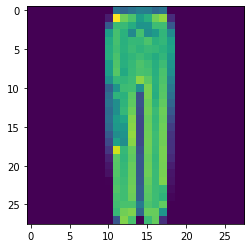

In [11]:
plt.imshow(training_data[1000][0])

In [12]:
test_data = [(np.ndarray.flatten(np.array(img))/255,cat) for img,cat in test_data]
training_data = [(np.ndarray.flatten(np.array(img))/255,cat) for img,cat in training_data]
np.random.shuffle(training_data) # on mélange les données d'entraînement qui étaient classées
training_data = training_data[:10000]

In [13]:
tb = training_data[0:100]
len(tb[0][0])

784

In [14]:
def propagate(w,b,training_data):
    n = len(training_data)
    m = len(training_data[0][0])
    S = 0
    gradw = np.zeros(m)
    gradb = 0
    for x,y in training_data:
        S += (y-np.dot(w, x) - b)**2
        gradb += 2*(b-y) -2*y*np.dot(w, x)
        gr = np.dot(x,w) + b - y
        gradw += 2*x*gr 
    S /= n
    cout = S
    gradw /= n
    gradb /= n
    return (cout,gradw,gradb)

In [15]:
def optimize_gd(w,b,training_data,rate=5e-3,maxiter=1000,info=50):
    i = 0
    cout = 100
    couts = []
    while i<maxiter and cout>rate:
        cout,gradw,gradb = propagate(w,b,training_data)
        #if i%info ==0:
          #print(cout)
        couts.append(cout)
        w = w - gradw*rate 
        b = b - gradb*rate
        i += 1
    return w,b,couts

In [16]:
m = len(training_data[0][0]) 
w = np.zeros(m)
b = 0
w, b, couts1 = optimize_gd(w,b,training_data,maxiter = 200)

In [17]:
def test_params(w,b,test_data):
    k = len(test_data)
    S = 0
    for x, y in test_data:
        yt = np.dot(w, x) + b
        if np.abs(yt-y)<0.5:
            S += 1
    return S/k
  

In [18]:
test_params(w, b, test_data)

0.3011

**Descente de gradient stochastique**

In [19]:
def optimize_sgd(w,b,training_data,rate=5e-4,maxiter=40,info=1):
    k = 0
    n = len(training_data)
    couts = []
    cout = 100
    while k<maxiter and cout>rate:
        randList = list(range(n))
        np.random.shuffle(randList)
        cout_epoch = 0
        for j in randList:
            cout,gradw,gradb = propagate(w, b, [training_data[j]])
            w = w - gradw*rate
            b = b - gradb*rate
            cout_epoch += cout
        cout = cout_epoch/n
        couts.append(cout)
        k += 1
    return w,b,couts

In [20]:
m = len(training_data[0][0]) 
w = np.zeros(m)
b = 0
w,b,couts2 = optimize_sgd(w,b,training_data, maxiter = 200)

In [21]:
def test_params2(w,b,test_data):
    k = len(test_data)
    S = 0
    for i in range(k):
        xi = test_data[i][0]
        yi = test_data[i][1]
        yt = np.dot(w, xi) + b
        if np.abs(yt-yi)<0.5:
            S += 1
    return S/k


In [22]:
test_params2(w,b,test_data)

0.2872

**Mini-batch**

In [23]:
def optimize_sgdm(w,b,training_data,batch_size=100,rate=5e-4,maxiter=40,info=1):
    k = 0
    couts = []
    cout = 100
    n = len(training_data)
    while k<maxiter and cout>rate:
        np.random.shuffle(training_data)
        cout_epoch = []
        for j in range(0,n,batch_size):
            training_batch = training_data[j:j+batch_size]
            cout, gradw, gradb = propagate(w, b, training_batch)
            w = w - gradw*rate
            b = b - gradb*rate
            cout_epoch.append(cout)
        k += 1
        couts.append(np.mean(cout_epoch))
    return w, b, couts


In [24]:
m = len(training_data[0][0]) 
w = np.zeros(m)
b = 0
w,b,couts3 = optimize_sgdm(w,b,training_data,maxiter=200)

In [25]:
def test_params3(w,b,test_data):
    k = len(test_data)
    S = 0
    for i in range(k):
        xi = test_data[i][0]
        yi = test_data[i][1]
        yt = np.dot(w, xi) + b
        if np.abs(yt-yi)<0.5:
            S += 1
    return S/k
test_params3(w,b,test_data)

0.3266

**Comparaison des vitesses de convergences**

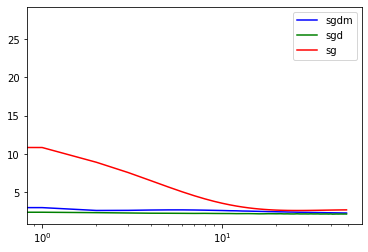

In [26]:
def graph(**kwargs):
    colors = "bgrcmykw:"
    fig, ax = plt.subplots()

    for name,color in zip(kwargs,colors):
        ax.semilogx(kwargs[name],color,label=name)
    ax.legend()
    plt.show()

# exemple d'utilisation
graph(sgdm= couts3[:50], sgd = couts2[:50], sg = couts1[:50])
# le label de [1,2,3] est "toto1"

**Méthode des moments**

In [27]:
def optimize_sgd_moment(w,b,training_data,rate=1e-3,batch_size=100, mu=0.90,maxiter=40,info=1):
    k = 0
    n = len(training_data)
    m = len(training_data[0][0])
    couts = []
    cout = 100
    v = np.zeros(m)
    while k<maxiter and cout>rate:
        np.random.shuffle(training_data)
        cout_epoch = []
        for j in range(0,n,batch_size):
            training_batch = training_data[j:j+batch_size]
            cout, gradw, gradb = propagate(w, b, training_batch)
            cout_epoch.append(cout)
            v = mu*v - rate*gradw
            w = np.add(w, v)
            b = b - gradb*rate
        couts.append(np.mean(cout_epoch))
        k += 1
    return w,b,couts

In [28]:
m = len(training_data[0][0]) 
w = np.zeros(m)
b = 0
w,b,couts_moment = optimize_sgd_moment(w,b,training_data, mu = .8, maxiter = 200)

In [29]:
def test_params3(w,b,test_data):
    k = len(test_data)
    S = 0
    for i in range(k):
        xi = test_data[i][0]
        yi = test_data[i][1]
        yt = np.dot(w, xi) + b
        if np.abs(yt-yi)<0.5:
            S += 1
    return S/k
test_params3(w,b,training_data)

0.3544

**La Méthode du moment de Nesterov**

In [30]:
def optimize_sgd_nesterov(w,b,training_data,rate=1e-5,batch_size =100, mu=0.95,maxiter=40,info=1):
    k = 0
    n = len(training_data)
    m = len(training_data[0][0])
    couts = []
    cout = 100
    v = np.zeros(m)
    while k<maxiter and cout>rate:
        np.random.shuffle(training_data)
        cout_epoch = []
        for j in range(0,n,batch_size):
            w = np.add(w,mu*v)
            training_batch = training_data[j:j+batch_size]
            cout, gradw, gradb = propagate(w, b, training_batch)
            cout_epoch.append(cout)
            v = np.add(mu*v, -rate*gradw)
            w = np.add(w, v)
            b = b - gradb*rate
        couts.append(np.mean(cout_epoch))
        k += 1
    return w,b,couts


In [31]:
m = len(training_data[0][0]) 
w = np.zeros(m)
b = 0
w,b,couts_nesterovsgd = optimize_sgd_nesterov(w,b,training_data, mu = .9, maxiter = 200)

In [32]:
def test_params3(w,b,test_data):
    k = len(test_data)
    S = 0
    for i in range(k):
        xi = test_data[i][0]
        yi = test_data[i][1]
        yt = np.dot(w, xi) + b
        if np.abs(yt-yi)<0.5:
            S += 1
    return S/k
test_params3(w,b,training_data)

0.3263

In [33]:
def optimize_sg_nesterov(w,b,training_data,rate=1e-5,mu=0.95,maxiter=500,info=10):
    i = 0
    cout = 100
    couts = []
    v = np.zeros(m)
    while i<maxiter and cout>rate:
        w = np.add(w, mu*v)
        cout,gradw,gradb = propagate(w,b,training_data)
        if i%info ==0:
            print(cout)
        couts.append(cout)
        v = np.add(mu*v, -rate*gradw)
        w = np.add(w, v)
        b = b - gradb*rate
        i += 1
    return w,b,couts

In [34]:
m = len(training_data[0][0]) 
w = np.zeros(m)
b = 0
w,b,couts_nesterovsg = optimize_sgd_nesterov(w,b,training_data, mu = .9, maxiter = 200)

In [35]:
def test_params3(w,b,test_data):
    k = len(test_data)
    S = 0
    for i in range(k):
        xi = test_data[i][0]
        yi = test_data[i][1]
        yt = np.dot(w, xi) + b
        if np.abs(yt-yi)<0.5:
            S += 1
    return S/k
test_params3(w,b,training_data)

0.3261

**Méthode d'Adam**

In [36]:
def optimize_sgd_adam(w,b,training_data,rate=1e-3,beta1=0.9,beta2=0.999,batch_size=100,epsilon=1e-8,maxiter=10,info=1):
    k = 0
    n = len(training_data)
    m = len(training_data[0][0])
    couts = []
    cout = 100
    v = np.zeros(m)
    m = np.zeros(m)
    while k<maxiter and cout>rate:
        np.random.shuffle(training_data)
        cout_epoch = []
        k += 1
        for j in range(0,n,batch_size):
            training_batch = training_data[j:j+batch_size]
            cout, gradw, gradb = propagate(w, b, training_batch)
            cout_epoch.append(cout)
            m = beta1*m + (1-beta1)*gradw
            v = beta2*v + (1-beta2)*(gradw**2)
            h = v/(1-beta2**k)
            w = np.add(w, - rate*m/(np.sqrt(h)+epsilon)/(1-beta1**k))
            b = b - gradb*rate
        couts.append(np.mean(cout_epoch))
    
    return w,b,couts

In [37]:
m = len(training_data[0][0]) 
w = np.zeros(m)
b = 0
w,b,couts_adam = optimize_sgd_adam(w,b,training_data, maxiter = 200)

In [38]:
 def test_params3(w,b,test_data):
    k = len(test_data)
    S = 0
    for i in range(k):
        xi = test_data[i][0]
        yi = test_data[i][1]
        yt = np.dot(w, xi) + b
        if np.abs(yt-yi)<0.5:
            S += 1
    return S/k
test_params3(w,b,training_data)

0.3271

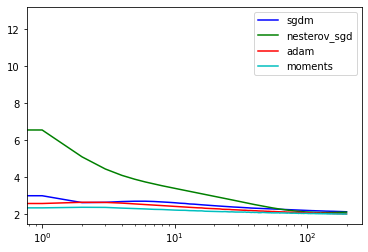

In [39]:
def graph(**kwargs):
    colors = "bgrcmykw:"
    fig, ax = plt.subplots()

    for name,color in zip(kwargs,colors):
        ax.semilogx(kwargs[name],color,label=name)
    ax.legend()
    plt.show()

# exemple d'utilisation
graph( sgdm = couts3, nesterov_sgd = couts_nesterovsgd, adam = couts_adam, moments = couts_moment) 
# le label de [1,2,3] est "toto1"

On remarque la rapide convergence des méthodes de Nesterov et Adam comparées à la descente de gradient stochastique, quelques epochs suffisent pour avoir des résultats satisfaisantes. Les résultats de la comparaison suivante montrent que c'est pas une bonne idée de prendre des batch aléatoires à chaque itération (la performance est médiocre et la convergence est lente). Il est donc préférable d'itérer sur tout le jeux de données.

In [43]:
def optimize_sgd_adam2(w,b,training_data,rate=1e-3,beta1=0.9,beta2=0.999,batch_size=100,epsilon=1e-8,maxiter=200,info=1):
    k = 0
    n = len(training_data)
    m = len(training_data[0][0])
    couts = []
    cout = 100
    v = np.zeros(m)
    m = np.zeros(m)
    while k<maxiter and cout>rate:
        np.random.shuffle(training_data)
        k += 1
        j = batch_size
        training_batch = training_data[j:j+batch_size]
        cout, gradw, gradb = propagate(w, b, training_batch)
        m = beta1*m + (1-beta1)*gradw
        v = beta2*v + (1-beta2)*(gradw**2)
        h = v/(1-beta2**k)
        w = np.add(w, - rate*m/(np.sqrt(h)+epsilon)/(1-beta1**k))
        b = b - gradb*rate
        couts.append(cout)
    return w,b,couts

In [44]:
m = len(training_data[0][0]) 
w = np.zeros(m)
b = 0
w,b,couts_adam2 = optimize_sgd_adam2(w,b,training_data, maxiter = 200)

In [45]:
def test_params3(w,b,test_data):
    k = len(test_data)
    S = 0
    for i in range(k):
        xi = test_data[i][0]
        yi = test_data[i][1]
        yt = np.dot(w, xi) + b
        if np.abs(yt-yi)<0.5:
            S += 1
    return S/k
test_params3(w,b,training_data)

0.2693

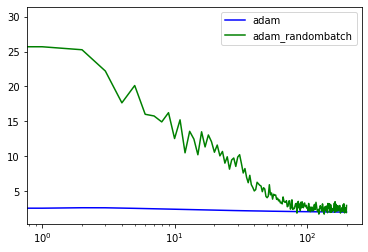

In [46]:
def graph(**kwargs):
    colors = "bgrcmykw:"
    fig, ax = plt.subplots()

    for name,color in zip(kwargs,colors):
        ax.semilogx(kwargs[name],color,label=name)
    ax.legend()
    plt.show()

# exemple d'utilisation
graph( adam = couts_adam, adam_randombatch= couts_adam2 ) 